In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import glob

from ukbb_recessive.data_collection.dataset import RegressionDataset

In [3]:
datasets_save_path = '.../450k/datasets'

#_____________________________________________________________________________________________________________________________
s_het_paths = {
    'Weghorn-drift': ".../450k/selection_weghorn/weghorn_drift_gencode-v34.txt",
    'Cassa': ".../450k/selection_cassa/cassa_supp_table_1_gencode-v34.txt",
    'PLI': ".../450k/selection_pli/gnomad.v2.1.1.PLI_gencode-v34.txt", 
    "Roulette": ".../450k/selection_roulette/s_het_roulette_gencode-v34.csv",
    'GeneBayes': ".../450k/selection_genebayes/s_het_genebayes_gencode-v34.csv"
}

#_____________________________________________________________________________________________________________________________
# phenotypic paths
age_children_path = ".../450k/phenotypes/age_children_data_participant.tsv" 
pca_path = ".../450k/phenotypes/PC_participant.tsv"
other_features_path = (
    ".../450k/phenotypes/phenotypes_of_interest_participant.tsv"
)

#_____________________________________________________________________________________________________________________________
# samples of interest: European & non-related
european_non_rel_samples = (
    ".../450k/samples/european_non_related_no_withdrawal_to_include_450k.txt"
)

#_____________________________________________________________________________________________________________________________
# plps paths
variants_paths_cfg = {
    'recessive' : {
        'cohort_files': glob.glob(".../450k/RAP_output_per_chr/filtered_plps/basic/new_gene_names/new_freq/new_relatedness/chr*"), 
        'all_variants_file': ".../450k/plp_selection/basic/new_gene_names/new_freq/new_relatedness/all_chr_total_presumable_plps_HFE_final_sorted.txt"
    },
    'lof': {
        'cohort_files': glob.glob(f".../data_450k/sample_lofs/*.normed.csv"),
        'all_variants_file': ".../data_450k/annotations/all_singetones_annotated.csv"
    },
}
#_____________________________________________________________________________________________________________________________
# gene info
gencode = ".../genCode/GRCh38/v34/gencode.v34.GRCh38.txt"


#gene panel
gene_panel = pd.read_csv(".../450k/regions/gene-panel-gencode-v34.txt", header=None)
gene_panel.columns = ['Gene name', 'Gene panel']

gene_panel_AR_without_id = gene_panel[gene_panel['Gene panel'] != 'ID-total'].copy()
gene_panel_AR_without_id['Gene panel'] = 'AR_without_ID'

gene_panel['Gene panel'] = gene_panel['Gene panel'].apply(lambda x: x.replace('-', '_').replace('+', '_'))

gene_panel = pd.concat([gene_panel, gene_panel_AR_without_id])

gene_panel.tail(3)



Gene name     Gene panel
1926       XPC  AR_without_ID
1927  ZMPSTE24  AR_without_ID
1928    ZNF469  AR_without_ID

# Collect phenotypic info

In [3]:
with open(european_non_rel_samples, 'r') as f:
    european_non_rel_samples = [l.strip() for l in f.readlines()]

print (f"Number of european non-related samples: {len(european_non_rel_samples)}")

features = RegressionDataset(
    age_children_path = age_children_path, 
    pca_path = pca_path, 
    other_features_path = other_features_path,
    samples_list = european_non_rel_samples, 
).collect_phenotypic_features()

Number of european non-related samples: 378751

Entering `collect_phenotype_features` function...
Current columns names list: ['eid', 'number_of_children_fathered', 'number_of_live_births', 'birth_cohort', 'age_at_recruitment', 'gender', 'people_number_in_household', 'people_related_in_household', 'qualifications', 'fluid_intelligence_score', 'email', 'age_first_sex', 'handedness', 'hair_color', 'gp_record', 'mental_health_problems', 'diagnosis_main_ICD10', 'diagnosis_secondary_ICD10', 'height', 'PCA_1', 'PCA_2', 'PCA_3', 'PCA_4', 'PCA_5', 'PCA_6', 'PCA_7', 'PCA_8', 'PCA_9', 'PCA_10', 'PCA_11', 'PCA_12', 'PCA_13', 'PCA_14', 'PCA_15', 'PCA_16', 'PCA_17', 'PCA_18', 'PCA_19', 'PCA_20', 'PCA_21', 'PCA_22', 'PCA_23', 'PCA_24', 'PCA_25', 'PCA_26', 'PCA_27', 'PCA_28', 'PCA_29', 'PCA_30', 'PCA_31', 'PCA_32', 'PCA_33', 'PCA_34', 'PCA_35', 'PCA_36', 'PCA_37', 'PCA_38', 'PCA_39', 'PCA_40']

Number of samlples with features: 502394
Function `collect_phenotype_features` finished.

Phenotypic featur

Mistakes children: 0
Missing children: 1806
Missing children: 1806
Childlessness: 73298
Childlessness missing: 1806


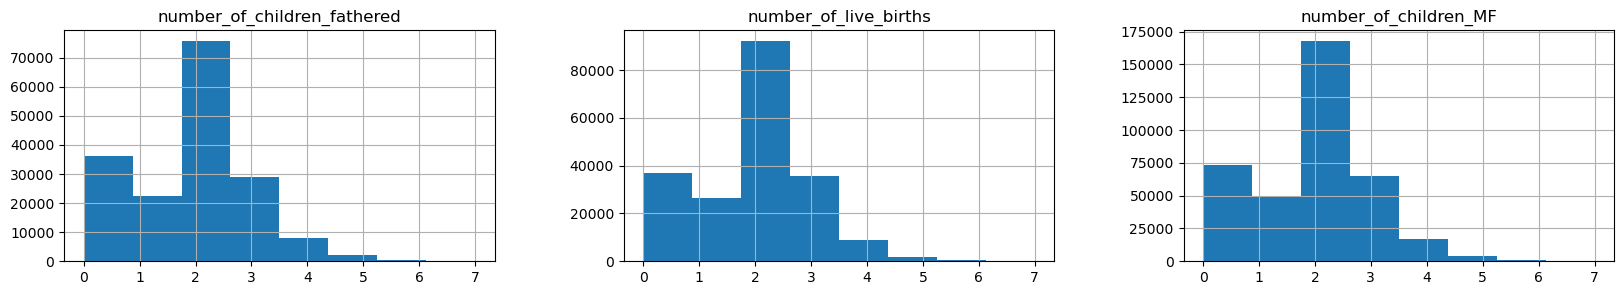

In [4]:
print ("Mistakes children:", sum((~features['number_of_children_fathered'].isnull()) & (~features['number_of_live_births'].isnull())))
print ("Missing children:", sum((features['number_of_children_fathered'].isnull()) & (features['number_of_live_births'].isnull())))
print ("Missing children:", sum(features['number_of_children_MF'].isnull()))
print ("Childlessness:", int(features['childlessness'].sum()))
print ("Childlessness missing:", sum(features['childlessness'].isnull()))


features[['number_of_children_fathered', 'number_of_live_births', 'number_of_children_MF']].hist(bins=8, figsize=(20, 3), layout=(1, 3))

plt.show()

Total number of individuals: 378751
Number of individuals with university degree: 117476
Number of individuals with higher educational degree: 264780


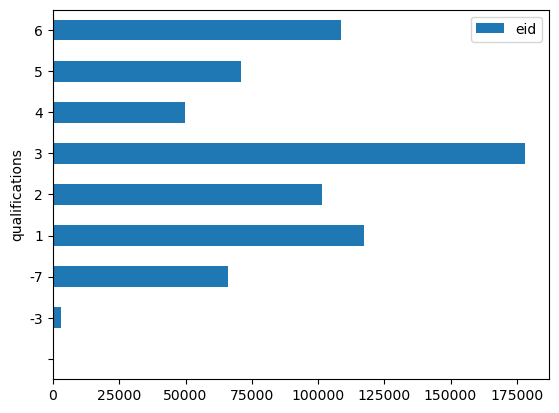

In [5]:
print ("Total number of individuals:", features.shape[0])
print ("Number of individuals with university degree:", int(features['uni_1_0_including_none'].sum()))
print ("Number of individuals with higher educational degree:", int(features['higher_education_including_none'].sum()))

qualifications = features[['eid', 'qualifications']].copy()
qualifications['qualifications'] = qualifications['qualifications'].apply(lambda x: x.split('|'))
qualifications = qualifications.explode('qualifications')
qualifications.drop_duplicates().groupby('qualifications').count().plot.barh()

plt.show()

In [6]:
print ("Number of individuals with partner:", int(features['living_with_a_partner'].sum()))
print()
print ("Number of individuals with mental health ICD diagnosis:", int(features['ICD_mental_health_yes_no'].sum()))
print ("Number of individuals with mental health questionnarie:", int(features['mental_health_Q'].sum()))
print()
print ("Number of individuals with email:", int(features['email'].sum()))
print()
print ("Number of ever had sex:", int(features['ever_had_sex'].sum()))
print ("Number of never had sex:", int((1 - features['ever_had_sex']).sum()))
print()
print ("Number has gp record sex:", int(features['has_gp_record'].sum()))
print()
print ("Number left-handed:", int(features['is_left_handed'].sum()))
print()
print ("Number blond:", int(features['is_blond'].sum()))
print()
print ("Number infertility:", int(features['ICD_infertility'].sum()))

Number of individuals with partner: 280429

Number of individuals with mental health ICD diagnosis: 2655
Number of individuals with mental health questionnarie: 38844

Number of individuals with email: 224875

Number of ever had sex: 333489
Number of never had sex: 3228

Number has gp record sex: 176974

Number left-handed: 36254

Number blond: 43288

Number infertility: 892


# Collect s-het info

## Prepare gene panels

In [7]:
# Create gene panels recessive
recessive_panels_dict = gene_panel.groupby('Gene panel').agg({'Gene name': lambda x: list(x)}).to_dict()['Gene name']
recessive_panels_dict['all'] = None

ADAR_genes = pd.read_csv('.../450k/regions/ADAR_genes_gencode-v34.txt', header=None)[0].values.tolist()

recessive_panels_dict['AD'] = ADAR_genes
recessive_panels_dict['AR'] = list(set(gene_panel['Gene name'].unique().tolist()) - set(ADAR_genes))


recessive_panels_dict['ID_without_AD'] = list(set(recessive_panels_dict['ID_total']) - set(ADAR_genes))


# Create gene panels for lof
all_genes = set(pd.read_csv(gencode, sep='\t', low_memory=False)['name2'].drop_duplicates().values.tolist())
AR_genes = set(gene_panel['Gene name'].drop_duplicates().values.tolist())


ID_AR_genes = set(recessive_panels_dict['ID_total'])
non_ID_AR_genes = AR_genes - ID_AR_genes

non_AR_genes = all_genes - AR_genes
lof_panels_dict = {'all': None, 'without_AR': non_AR_genes, 'AR': AR_genes}

print ("All genes number:", len(all_genes))
print ("Non-AR genes number:", len(non_AR_genes))

All genes number: 62432
Non-AR genes number: 60503


In [8]:
s_het_cfg = {
    'lof': lof_panels_dict,
    'recessive' : recessive_panels_dict
}

for dataset_type in s_het_cfg:
    print (f"Dataset = {dataset_type}")
    for panel, gene_list in s_het_cfg[dataset_type].items():

        print (f"\tPanel={panel}, number of genes={len(gene_list) if gene_list is not None else 'NA' }")
    print()

Dataset = lof
	Panel=all, number of genes=NA
	Panel=without_AR, number of genes=60503
	Panel=AR, number of genes=1929

Dataset = recessive
	Panel=AR_without_ID, number of genes=1566
	Panel=Blindness, number of genes=85
	Panel=Cardiovascular, number of genes=17
	Panel=Cilia_Kidney, number of genes=74
	Panel=Deafness, number of genes=38
	Panel=Derm, number of genes=59
	Panel=Endocrine, number of genes=33
	Panel=Hematologic, number of genes=39
	Panel=ID_total, number of genes=363
	Panel=Immune_system, number of genes=91
	Panel=Metabolic, number of genes=318
	Panel=Metabolic_ID, number of genes=353
	Panel=Neuromuscular, number of genes=113
	Panel=No_panel, number of genes=10
	Panel=Overlaps, number of genes=271
	Panel=Skeletal_Craniofacial, number of genes=61
	Panel=Tumor, number of genes=4
	Panel=all, number of genes=NA
	Panel=AD, number of genes=324
	Panel=AR, number of genes=1605
	Panel=ID_without_AD, number of genes=332
	Panel=sampled_AR_without_ID, number of genes=355
	Panel=sampled_I

## Collect s_het data

In [9]:
result = {}

for s_het_key, s_het_path in s_het_paths.items():
    print (f"Collecting data for {s_het_key}\n")

    for dataset_type in s_het_cfg:
        print (f"Dataset = {dataset_type}")

        for panel, gene_list in s_het_cfg[dataset_type].items():

            print (f"\tPanel={panel}, number of genes={len(gene_list) if gene_list is not None else 'NA' }")
            print ("_____________________")
            s_het_features = RegressionDataset(
                het_occurrence_threshold=20., 
                all_plps_file=variants_paths_cfg[dataset_type]['all_variants_file'], 
                s_het_file=s_het_path,
                cohort_plps_files=variants_paths_cfg[dataset_type]['cohort_files'], 
                genes_list=gene_list,
                dataset=dataset_type
            ).collect_variant_features()
            
            # rename columns
            for col in s_het_features.columns.tolist():
                if col != 'eid':
                    s_het_features = s_het_features.rename(columns={col: f"{col}_{dataset_type}_{panel}"})

            if s_het_key not in result:
                result[s_het_key] = s_het_features
            else:
                result[s_het_key] = result[s_het_key].merge(s_het_features, on="eid", how='outer')
            print ("_____________________")



Dataset = lof
	Panel=all, number of genes=NA
_____________________
Dataset type: lof
Ignoring het_occurence_threshold = 20.0

Entering `calculate_s_het_per_sample` function...

Entering `collect_lofs` function...
Initial total numbers of LoFs: 17190
Total numbers of LoFs after handling gene overlap: 16975
Total numbers of LoFs with null s_het after handling gene overlap: 271
Function `collect_lofs` finished.

All LOFs in the cohort: 16975
Heterozygous-only LOFs in the cohort: 16973
Total numbers of LoF variants in cohort: 16973
Total numbers of selected LoF variants in cohort: 16973
Total numbers of selected LoF variants in cohort, one per gene: 16773
Function `calculate_s_het_per_sample` finished.

_____________________
	Panel=without_AR, number of genes=60503
_____________________
Dataset type: lof
Ignoring het_occurence_threshold = 20.0

Entering `calculate_s_het_per_sample` function...

Entering `collect_lofs` function...
Initial total numbers of LoFs: 17190
Total numbers rare LoF

In [10]:
# check shapes
for s_het_key in s_het_paths:
    print (f"Shape for variants features of {s_het_key}:", result[s_het_key].shape)

Shape for variants features of Weghorn-drift: (150732, 131)
Shape for variants features of Cassa: (150732, 131)
Shape for variants features of PLI: (150732, 131)
Shape for variants features of Roulette: (150732, 131)
Shape for variants features of GeneBayes: (150732, 131)


# Merge and fill-in NA

In [11]:
 # fill NA for s_het with PLP but no information about s_het
fill_na_shet = True

for s_het_key in s_het_paths:
    print (f"Merging data for {s_het_key}")

    result[s_het_key] = features.merge(result[s_het_key], on='eid', how='left')

    for dataset_type in s_het_cfg:
        print (f"\tDataset = {dataset_type}")

        for panel, gene_list in s_het_cfg[dataset_type].items():
            
            columns = [f"{col}_{dataset_type}_{panel}" for col in ['s_het', 'mutations_cnt', 'has_mutation']]

            # fills NAs with 0s
            result[s_het_key][columns] = result[s_het_key][columns].fillna(0.)

            # fill NAs for s_het of recessive PLP carriers with no s_het information
            if fill_na_shet:
                result[s_het_key].loc[(result[s_het_key][f'mutations_cnt_{dataset_type}_{panel}'] > 0) & 
                                      (result[s_het_key][f's_het_{dataset_type}_{panel}'] == 0),  f's_het_{dataset_type}_{panel}'] = None

Merging data for Weghorn-drift
	Dataset = lof
	Dataset = recessive
Merging data for Cassa
	Dataset = lof
	Dataset = recessive
Merging data for PLI
	Dataset = lof
	Dataset = recessive
Merging data for Roulette
	Dataset = lof
	Dataset = recessive
Merging data for GeneBayes
	Dataset = lof
	Dataset = recessive


In [12]:
# check shapes
for s_het_key in s_het_paths:
    print (f"Shape for all features of {s_het_key}:", result[s_het_key].shape)

# Shape for all features of Weghorn-drift: (376872, 231)

Shape for all features of Weghorn-drift: (378751, 210)
Shape for all features of Cassa: (378751, 210)
Shape for all features of PLI: (378751, 210)
Shape for all features of Roulette: (378751, 210)
Shape for all features of GeneBayes: (378751, 210)


In [13]:
for s_het_key in s_het_paths:
    print (f"Saving {s_het_key}", flush=True)
    result[s_het_key].to_csv(f'{datasets_save_path}/{s_het_key}.csv', sep='\t', index=False)

Saving Weghorn-drift
Saving Cassa
Saving PLI
Saving Roulette
Saving GeneBayes


In [15]:
! ls -lah .../450k/datasets

total 2.2G
drwxrwx--- 2 steven bioinf  148 Jul 12 11:18 .
drwxrwx--- 5 steven bioinf  102 Jun 25 12:52 ..
-rwxrwx--- 1 steven bioinf 361M Jul 12 15:44 Cassa.csv
-rwxrwx--- 1 gelana bioinf 363M Jul 12 15:46 GeneBayes.csv
-rwxrwx--- 1 steven bioinf 359M Jul 12 15:45 PLI.csv
-rwxrwx--- 1 steven bioinf 361M Jul 12 15:45 Roulette.csv
-rwxrwx--- 1 steven bioinf 359M Jul 12 15:44 Weghorn-drift.csv
